# <span>📑 Agenda </span>
<hr>

⚙️ [**Architecture explanation**](#1) <br>
📌 [**Constants**](#2) <br>
💾 [**Datasets**](#3) <br>
🖼️ [**Images visualization**](#4) <br>
🇰 [**Keras**](#5) <br>
🇹 [**Torch**](#6) <br>
🇹 🇫 [**TensorFlow**](#7) <br>
🇹 🇫 [**TensorFlow version 2**](#8) <br>
🏁 [**Results**](#9) <br>

# <span id="1">⚙️ Architecture explanation </span>
<hr>

In [1]:
import os
import cv2
from matplotlib import animation, rc
import matplotlib.pyplot as plt

rc('animation', html='jshtml')

In [2]:
directory = os.path.abspath('') + '/images/'
image_list = ['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png']
images = [
    cv2.cvtColor(
        cv2.imread(directory + image), 
        cv2.COLOR_RGB2BGR
    ) for image in image_list
]

In [3]:
def animate(ims):
    fig = plt.figure(figsize=(25, 12))
    plt.axis('off')
    im = plt.imshow(ims[0])
    plt.close()
    
    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000)

In [4]:
movie = animate(images)
movie

# <span id="2">📌 Constants </span>
<hr>

In [5]:
CLASSES = 10
TRAINING_BATCH = 128
TEST_BATCH = 1
LR = 0.001
EPOCHS = 5
DROPOUT_RATE = 0.5

scores = dict()

# <span id="3">💾 Datasets</span>
<hr>

### *KERAS*

In [6]:
import numpy as np
import tensorflow as tf

2022-10-15 23:23:01.517279: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/quantum/anaconda3/envs/env666/lib/python3.9/site-packages/cv2/../../lib64:
2022-10-15 23:23:01.517302: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
def get_keras_mnist():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255

    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

    print("x_train shape:", x_train.shape)
    print(x_train.shape[0], "train samples")
    print(x_test.shape[0], "test samples")
    print("label representation:", y_test[0])
    
    return (x_train, y_train), (x_test, y_test)

In [8]:
(x_train_keras, y_train_keras), (x_test_keras, y_test_keras) = get_keras_mnist()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
label representation: 7


In [9]:
y_train_keras = tf.keras.utils.to_categorical(y_train_keras, CLASSES)
y_test_keras = tf.keras.utils.to_categorical(y_test_keras, CLASSES)

print("new label representation:", y_test_keras[0])

new label representation: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### *TORCH*

In [10]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [11]:
train_data_torch = datasets.MNIST(
    root='data',
    train=True,                         
    transform=ToTensor(),
    download=True
)

test_data_torch = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor(),
    download=True
)

In [12]:
print("label representation:", test_data_torch.targets[0])

label representation: tensor(7)


In [13]:
torch_loaders = {
    'train': torch.utils.data.DataLoader(
        train_data_torch, 
        batch_size=TRAINING_BATCH, 
        shuffle=True, 
        num_workers=0
    ),
    'test': torch.utils.data.DataLoader(
        test_data_torch, 
        batch_size=TEST_BATCH, 
        shuffle=False, 
        num_workers=0
    )
}

### *TENSORFLOW*

In [14]:
import numpy as np
import tensorflow as tf

In [15]:
(x_train, y_train), (x_test, y_test) = get_keras_mnist()

train_ds_tf = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(TRAINING_BATCH)
test_ds_tf = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(TEST_BATCH)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
label representation: 7


2022-10-15 23:23:04.411715: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/quantum/anaconda3/envs/env666/lib/python3.9/site-packages/cv2/../../lib64:
2022-10-15 23:23:04.411747: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-15 23:23:04.411773: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (quantum-HP-ProBook-450-G6): /proc/driver/nvidia/version does not exist
2022-10-15 23:23:04.412075: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

# <span id="4">🖼️ Images visualization</span>
<hr>

In [16]:
import matplotlib.pyplot as plt

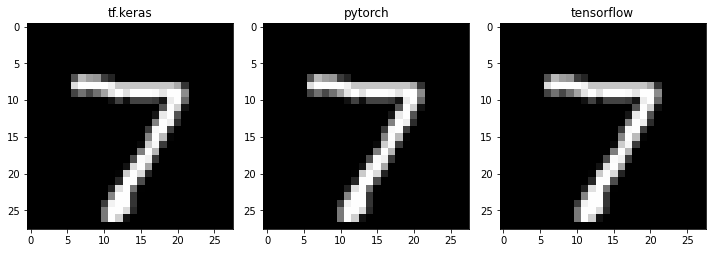

In [17]:
keras_image = x_test_keras[0]
torch_image = test_data_torch.data[0]
tf_image = list(test_ds_tf.as_numpy_iterator())[0][0].reshape((28, 28))

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

plt.subplot(1, 3, 1).title.set_text('tf.keras')
plt.imshow(keras_image, cmap='gray')
plt.subplot(1, 3, 2).title.set_text('pytorch')
plt.imshow(torch_image, cmap='gray')
plt.subplot(1, 3, 3).title.set_text('tensorflow')
plt.imshow(tf_image, cmap = "gray")
plt.show()

# <span id="5">🇰 Keras</span>
<hr>

In [18]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import Model

In [19]:
sequential_keras_model = tf.keras.Sequential(
    [
        Input(shape=(28, 28, 1)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(rate=DROPOUT_RATE),
        Dense(CLASSES, activation="softmax"),
    ]
)

sequential_keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [20]:
inp = Input(shape=(28, 28, 1))
x = Conv2D(32, kernel_size=(3, 3), activation="relu")(inp)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dropout(rate=DROPOUT_RATE)(x)
out = Dense(CLASSES, activation="softmax")(x)

io_keras_model = Model(inp, out)
io_keras_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0     

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=LR)
loss = tf.keras.losses.CategoricalCrossentropy()

io_keras_model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])
io_keras_model.fit(
    x_train_keras, 
    y_train_keras, 
    batch_size=TRAINING_BATCH, 
    epochs=EPOCHS, 
    validation_split=0.1
)

Epoch 1/5


2022-10-15 23:23:06.629285: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


422/422 [==============================] - 25s 59ms/step - loss: 0.3652 - accuracy: 0.8915 - val_loss: 0.0779 - val_accuracy: 0.9797
Epoch 2/5
422/422 [==============================] - 23s 55ms/step - loss: 0.1095 - accuracy: 0.9663 - val_loss: 0.0556 - val_accuracy: 0.9850
Epoch 3/5
422/422 [==============================] - 23s 54ms/step - loss: 0.0813 - accuracy: 0.9750 - val_loss: 0.0429 - val_accuracy: 0.9872
Epoch 4/5
422/422 [==============================] - 23s 55ms/step - loss: 0.0675 - accuracy: 0.9795 - val_loss: 0.0401 - val_accuracy: 0.9895
Epoch 5/5
422/422 [==============================] - 29s 68ms/step - loss: 0.0609 - accuracy: 0.9814 - val_loss: 0.0407 - val_accuracy: 0.9885


In [22]:
score = io_keras_model.evaluate(x_test_keras, y_test_keras, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test accuracy: {:.3f}".format(score[1]))

scores['tf.keras'] = round(score[1], 3)

Test loss: 0.036
Test accuracy: 0.988


# <span id="6">🇹 Torch</span>
<hr>

In [23]:
import torch
from torch import optim
from torch.nn import Conv2d, ReLU, MaxPool2d, Linear, Dropout
from torch.autograd import Variable

In [24]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()        
        self.conv1 = Conv2d(
            in_channels=1, 
            out_channels=32, 
            kernel_size=3, 
            stride=1, 
            padding=0
        )
        self.conv2 = Conv2d(
            in_channels=32, 
            out_channels=64, 
            kernel_size=3, 
            stride=1, 
            padding=0
        )
        self.activation = ReLU()
        self.pool = MaxPool2d(kernel_size=2)
        self.drop = Dropout(p=DROPOUT_RATE)
        self.out = Linear(in_features=64 * 5 * 5, out_features=CLASSES)
        
    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.pool(x)
        x = self.activation(self.conv2(x))
        x = self.pool(x)
        x = self.drop(x.view(x.size(0), -1))
        return self.out(x)

In [25]:
cnn = CNN()
loss_func = torch.nn.CrossEntropyLoss()   
optimizer = optim.Adam(cnn.parameters(), lr=LR)
cnn

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (activation): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout(p=0.5, inplace=False)
  (out): Linear(in_features=1600, out_features=10, bias=True)
)

In [26]:
def train(num_epochs, cnn, loaders):   
    cnn.train()
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            b_x = Variable(images)
            b_y = Variable(labels)
            loss = loss_func(cnn(b_x), b_y)
             
            optimizer.zero_grad()           
            loss.backward()      
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                    epoch + 1, num_epochs, i + 1, len(loaders['train']), loss.item()))               
    
train(EPOCHS, cnn, torch_loaders)

Epoch [1/5], Step [100/469], Loss: 0.2859
Epoch [1/5], Step [200/469], Loss: 0.2127
Epoch [1/5], Step [300/469], Loss: 0.1634
Epoch [1/5], Step [400/469], Loss: 0.1185
Epoch [2/5], Step [100/469], Loss: 0.0807
Epoch [2/5], Step [200/469], Loss: 0.0614
Epoch [2/5], Step [300/469], Loss: 0.2431
Epoch [2/5], Step [400/469], Loss: 0.0347
Epoch [3/5], Step [100/469], Loss: 0.0614
Epoch [3/5], Step [200/469], Loss: 0.0574
Epoch [3/5], Step [300/469], Loss: 0.1277
Epoch [3/5], Step [400/469], Loss: 0.0697
Epoch [4/5], Step [100/469], Loss: 0.1183
Epoch [4/5], Step [200/469], Loss: 0.0510
Epoch [4/5], Step [300/469], Loss: 0.0524
Epoch [4/5], Step [400/469], Loss: 0.0584
Epoch [5/5], Step [100/469], Loss: 0.0269
Epoch [5/5], Step [200/469], Loss: 0.0168
Epoch [5/5], Step [300/469], Loss: 0.0280
Epoch [5/5], Step [400/469], Loss: 0.0475


In [27]:
def evaluate_model(model):
    model.eval()    
    with torch.no_grad():
        correct = 0
        for images, labels in torch_loaders['test']:
            test_output = cnn(images)
            pred = torch.max(test_output, 1)[1]
            correct += (pred == labels).sum()
    return float(correct) / len(torch_loaders['test'])

score = evaluate_model(cnn)
print("Test accuracy: {:.3f}".format(score))
    
scores['torch'] = round(score, 3)

Test accuracy: 0.989


# <span id="7">🇹 🇫 TensorFlow</span>
<hr>

In [28]:
import tensorflow as tf

In [29]:
def conv2d(inputs , filters , stride_size):
    out = tf.nn.conv2d(
        inputs, 
        filters, 
        strides=[1 , stride_size , stride_size , 1], 
        padding='VALID'
    ) 
    return tf.nn.relu(out) 

def maxpool(inputs, pool_size, stride_size):
    return tf.nn.max_pool2d(
        inputs, 
        ksize=[1, pool_size, pool_size, 1], 
        padding='VALID', 
        strides=[1, stride_size, stride_size, 1]
    )

def dense(inputs , weights):
    return tf.matmul(inputs, weights)

In [30]:
initializer = tf.initializers.glorot_uniform()
def get_weight(shape, name):
    return tf.Variable(initializer(shape), name=name, trainable=True, dtype=tf.float32)

shapes = [
    [3 , 3 , 1 , 32 ], 
    [3 , 3 , 32 , 64 ],
    [1600, CLASSES]
]

weights = [get_weight(shapes[i], 'weight{}'.format(i)) for i in range(len(shapes))]

In [31]:
def model(x, training):
    x = tf.cast(x , dtype=tf.float32)
    x = conv2d(x, weights[0] , stride_size=1) 
    x = maxpool(x, pool_size=2 , stride_size=2)
    x = conv2d(x, weights[1] , stride_size=1)
    x = maxpool(x, pool_size=2 , stride_size=2)
    x = tf.reshape(x, shape=(tf.shape(x)[0], -1))
    if training:
        x = tf.nn.dropout(x, rate=DROPOUT_RATE)
    x = dense(x, weights[2])

    return tf.nn.softmax(x)

In [32]:
def loss(target, pred):
    return tf.losses.categorical_crossentropy(target, pred)

In [33]:
optimizer = tf.optimizers.Adam(learning_rate=LR)

def train_step(model, inputs, outputs, verbose=False):
    with tf.GradientTape() as tape:
        current_loss = loss(outputs, model(inputs, training=True))
    grads = tape.gradient(current_loss, weights)
    optimizer.apply_gradients(zip(grads , weights))
    if verbose:
        print('Loss: {:.4f}'.format(tf.reduce_mean(current_loss)))
    
verbose=False

for epoch in range(EPOCHS):
    print('Epoch [{}/{}]'.format(epoch + 1, EPOCHS))
    for i, (image, label) in enumerate(train_ds_tf):
        verbose=False
        if i%200 == 0:
            verbose=True
        train_step(model, image, tf.one_hot(label, depth=CLASSES), verbose)

Epoch [1/5]


2022-10-15 23:27:54.266818: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Loss: 2.3246
Loss: 0.1501
Loss: 0.1942
Epoch [2/5]


2022-10-15 23:28:24.032932: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Loss: 0.1691
Loss: 0.0898
Loss: 0.1539
Epoch [3/5]


2022-10-15 23:28:52.699199: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Loss: 0.0922
Loss: 0.0512
Loss: 0.1375
Epoch [4/5]
Loss: 0.0625
Loss: 0.0334
Loss: 0.1227
Epoch [5/5]
Loss: 0.0831
Loss: 0.0311
Loss: 0.0820


In [34]:
def evaluate_model():
    correct = 0
    for images, labels in test_ds_tf:
        pred = model(images, training=False)
        pred = tf.get_static_value(tf.math.argmax(pred, axis=1))[0]
        labels = tf.get_static_value(labels)[0]
        correct += (pred == labels).sum()
    return float(correct) / len(test_ds_tf)

score = evaluate_model()
print("Test accuracy: {:.3f}".format(score))
    
scores['tensorflow_1'] = round(score, 3)

Test accuracy: 0.986


# <span id="8">🇹 🇫 TensorFlow version 2</span>
<hr>

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [36]:
class CnnTf(tf.keras.Model):
    def __init__(self):
        super(CnnTf, self).__init__()
        self.conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')
        self.pool = MaxPooling2D(pool_size=(2, 2))
        self.conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')
        self.flatten = Flatten()
        self.dr1 = Dropout(rate=DROPOUT_RATE)
        self.d1 = Dense(CLASSES, activation="softmax")

    def call(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.dr1(x)
        return self.d1(x)

model = CnnTf()

In [37]:
loss_object = tf.losses.CategoricalCrossentropy()
optimizer = tf.optimizers.Adam(learning_rate=LR)

train_loss = tf.metrics.Mean(name='train_loss')

In [38]:
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)

In [39]:
for epoch in range(EPOCHS):
    train_loss.reset_states()
    for images, labels in train_ds_tf:
        train_step(images, tf.one_hot(labels, depth=CLASSES))

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, EPOCHS, train_loss.result()))

Epoch [1/5], Loss: 0.3441
Epoch [2/5], Loss: 0.1123
Epoch [3/5], Loss: 0.0868
Epoch [4/5], Loss: 0.0710
Epoch [5/5], Loss: 0.0638


In [40]:
def evaluate_model(model):
    correct = 0
    for images, labels in test_ds_tf:
        pred = model(images, training=False)
        pred = tf.get_static_value(tf.math.argmax(pred, axis=1))[0]
        labels = tf.get_static_value(labels)[0]
        correct += (pred == labels).sum()
    return float(correct) / len(test_ds_tf)

score = evaluate_model(model)
print("Test accuracy: {:.3f}".format(score))
    
scores['tensorflow_2'] = round(score, 3)

Test accuracy: 0.987


# <span id="9">🏁 Results</span>
<hr>

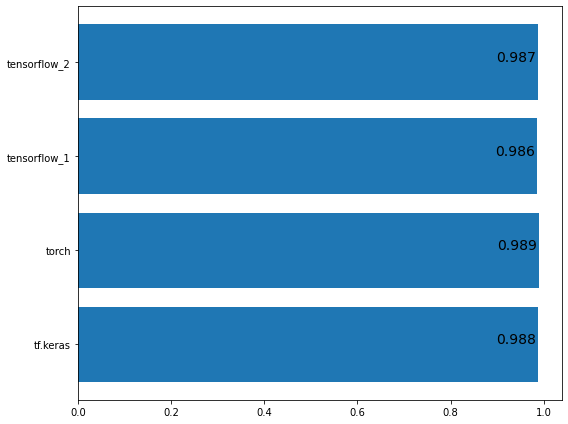

In [41]:
keys = list(scores.keys())
values = list(scores.values())

plt.figure(figsize=(8, 6))
plt.barh(keys, values)
for i in range(len(keys)):
    plt.text(values[i]-0.09, i+0.01, round(values[i], 3), size=14)

plt.show()